We have a data of customer, and metrics show their performance in sales and engagement (add to cart) 

**Business Target** 
   Segment customers that have the same performance (highest, medium, lowest) for trial program offering 
  
**General Idea** 
   Clustering each dimensions by K-Means and score each cluster. After that, sum of all score to define total score of each customer. 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/Users/nguyenngockimnhu/Documents/RFM_non_tkn_raw.csv')
df.describe()

,frontend_id,backend_id,frequency_sales,frequency_add,recency,nmv
count,1.785700e+04,1.785700e+04,17857.000000,17857.000000,17857.000000,1.785700e+04
mean,6.593495e+06,4.847783e+06,5.074929,34.292602,5.360083,3.704053e+06
std,5.519320e+06,4.397933e+06,7.664240,13.121542,4.961335,7.408944e+06
min,1.280000e+02,1.280000e+02,0.000000,20.000000,1.000000,0.000000e+00
25%,1.160799e+06,1.160796e+06,1.000000,24.000000,2.000000,3.120000e+05
50%,6.267402e+06,3.423623e+06,3.000000,31.000000,4.000000,1.527000e+06
75%,1.064650e+07,7.773393e+06,7.000000,41.000000,7.000000,3.889000e+06
max,1.890549e+07,1.587951e+07,257.000000,120.000000,44.000000,2.009899e+08


In [5]:
df.pop('backend_id')

0        11463743
1         4635487
2         5571657
3         4212346
4          882104
           ...   
17852     4218783
17853     9162357
17854     2774615
17855     4369541
17856    14515828
Name: backend_id, Length: 17857, dtype: int64

In [6]:
#There is no null value in each column. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17857 entries, 0 to 17856
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   frontend_id      17857 non-null  int64  
 1   frequency_sales  17857 non-null  int64  
 2   frequency_add    17857 non-null  int64  
 3   recency          17857 non-null  int64  
 4   nmv              17857 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 697.7 KB


**Step 1: Preprocess and visualize data**

In [40]:
df.isnull().sum()

frontend_id        0
frequency_sales    0
frequency_add      0
recency            0
nmv                0
dtype: int64

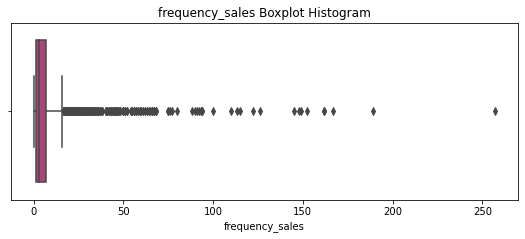

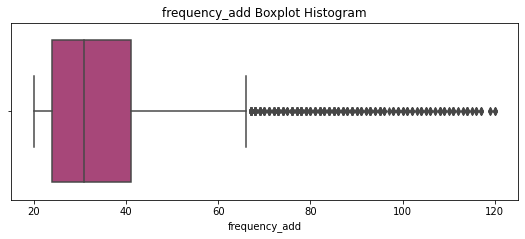

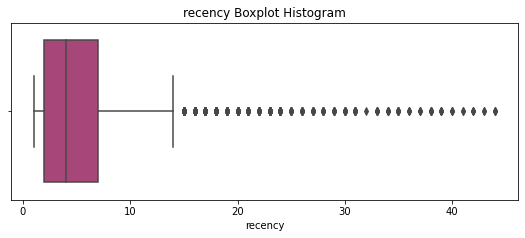

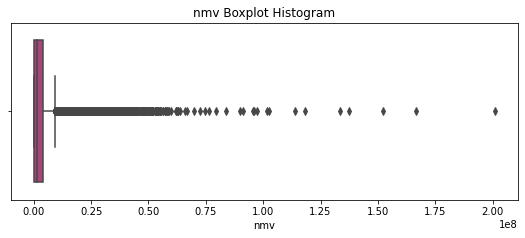

In [91]:
# Visualize numberic data: 

def visualize_boxplot(column,fig): 
    plt.figure(figsize = (20,15))
    plt.subplot(4,2,fig)
    plt.title(column+' Boxplot Histogram')
    sns.boxplot(df[column],palette='magma')

    
visualize_boxplot('frequency_sales',1)
visualize_boxplot('frequency_add',2)
visualize_boxplot('recency',3)
visualize_boxplot('nmv',4)

**Comments:**
- Seems that each dimension has many outliers, because we get data of all customers who maybe have add to carts but not sales. 
- We will not remove outliers, since we score each customer_id based on their performance. If we remove, we will missing many customers and the clustering will be underrated 

**Step 2: Apply K-Means model**

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')



1. Choosing K for model

In [87]:
# We try and apply each value of K in the model, and calculate the SSE (inertia_) at that K. 
# Then we visualize and decide which K is potential based on the Elbow method. 

def chose_k(feature): 
    sse={}
    df_main = df[[feature]]
    for k in range(1,10):
        k_mean = KMeans(n_clusters=k,init="k-means++",max_iter=1000).fit(df_main)
        df_main['cluster']= k_mean.labels_ 
        sse[k]=k_mean.inertia_    
    plt.figure(figsize=(8,3))
    plt.plot(list(sse.keys()),list(sse.values()))
    plt.xlabel(feature+' Number of cluster')
    
    plt.show()

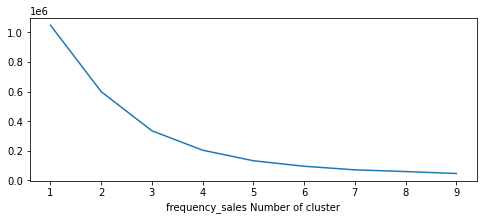

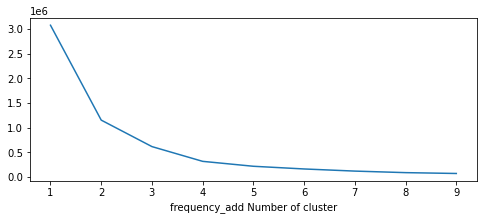

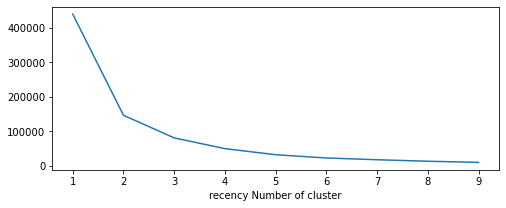

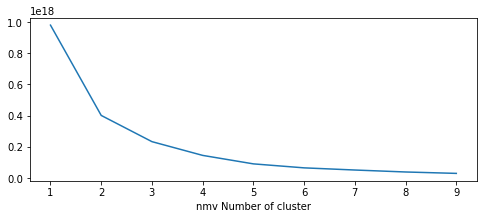

In [92]:
chose_k('frequency_sales')
chose_k('frequency_add')
chose_k('recency')
chose_k('nmv')

**Comments:** 

Base on the Elbow method, we will choose the K for each feature as below: 
- Frequency_sales: k = 5
- Frequency_add: k = 5 
- Recency: k = 5
- NMV: k = 5

2. Apply K-Means with K=5 to all feature

In [88]:
def apply_model(feature):
    k_means= KMeans(n_clusters = 5, init = 'k-means++')
    df[feature+' cluster'] = k_means.fit_predict (df[[feature]])

In [89]:
apply_model('frequency_sales')
apply_model('frequency_add')
apply_model('recency')
apply_model('nmv')

In [97]:
df

,frontend_id,frequency_sales,frequency_add,recency,nmv,frequency_sales cluster,frequency_add cluster,recency cluster,nmv cluster
0,14341885,0,36,6,0.0,0,0,1,2
1,7482651,0,35,2,0.0,0,0,4,2
2,8413145,0,35,4,0.0,0,0,1,2
3,7058197,0,35,8,0.0,0,0,2,2
4,882018,0,37,3,0.0,0,0,1,2
...,...,...,...,...,...,...,...,...,...
17852,7064637,33,96,2,133258626.4,3,4,4,4
17853,12039107,90,113,1,137291528.0,2,4,4,4
17854,5614930,113,111,3,152101152.0,4,4,1,4
17855,7215746,10,90,2,166411700.0,1,4,4,4


3. Order these cluster following the feature values. 

In [163]:
#Because when k-means clustering, its cluster index is random, so we need to sort the cluster index following the value 
#in that cluster columns. 

def order_cluster(cluster_field_name, value_order_field_name, ascending, inplace=True): 
    new_cluster_field_name = 'new '+cluster_field_name 
    df_new = df.groupby(cluster_field_name)[value_order_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=value_order_field_name,ascending=ascending).reset_index(drop = True)
    df_new['index']=df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name], axis =1 )
    df_final = df_final.rename(columns={'index':cluster_field_name})
    return df_final

In [171]:
df = order_cluster('frequency_sales cluster', 'frequency_sales', True)
df = order_cluster('frequency_add cluster', 'frequency_add', True)
df = order_cluster('nmv cluster', 'nmv', True)
df = order_cluster('recency cluster', 'recency', False)

df.head()

,frontend_id,frequency_sales,frequency_add,recency,nmv,frequency_sales cluster,frequency_add cluster,nmv cluster,recency cluster
0,14341885,0,36,6,0.0,0,1,0,3
1,8413145,0,35,4,0.0,0,1,0,3
2,882018,0,37,3,0.0,0,1,0,3
3,2144839,0,35,3,0.0,0,1,0,3
4,5805305,0,37,3,0.0,0,1,0,3


In [174]:
df.groupby('nmv cluster')['nmv'].describe()

,count,mean,std,min,25%,50%,75%,max
nmv cluster,,,,,,,,
0,13872.0,1.251510e+06,1.223621e+06,0.00,0.0,958300.0,2.074900e+06,4377500.0
1,3060.0,7.511938e+06,2.528617e+06,4378000.00,5364726.0,6878500.0,9.216950e+06,13950300.0
2,679.0,2.044936e+07,4.840481e+06,14001187.00,16211732.5,19380340.0,2.407678e+07,32135341.0
3,231.0,4.385752e+07,9.211559e+06,32215800.00,36485905.0,42118020.0,4.963941e+07,79261158.0
4,15.0,1.186398e+08,3.341386e+07,83648640.99,95719300.0,102454970.0,1.352751e+08,200989888.0


In [175]:
df['overall_score'] = df['frequency_sales cluster'] + df['frequency_add cluster'] + df['recency cluster'] + df['nmv cluster']

In [179]:
df.groupby('overall_score')['frontend_id'].count()

overall_score
1      790
2     1672
3     2910
4     3615
5     3028
6     2274
7     1516
8      899
9      484
10     272
11     168
12     125
13      69
14      23
15      12
Name: frontend_id, dtype: int64

In [184]:
df_mean = df.groupby('overall_score')[['frequency_sales','frequency_add','recency','nmv']].median()
df_count = df.groupby('overall_score')[['frontend_id']].count()
df_new = pd.merge(df_mean,df_count, on = 'overall_score')
df_new.sort_values(by='overall_score',ascending=False)

,frequency_sales,frequency_add,recency,nmv,frontend_id
overall_score,,,,,
15,119.5,110.0,1.0,73035128.0,12
14,50.0,99.0,1.0,46313251.0,23
13,43.0,89.0,1.0,28994957.0,69
12,23.0,82.0,1.0,25489792.0,125
11,16.0,70.0,1.0,21860689.5,168
10,14.0,54.0,2.0,15697815.0,272
9,10.0,51.0,2.0,10067674.5,484
8,8.0,48.0,2.0,5956370.0,899
7,6.0,45.0,2.0,3455639.0,1516


- Above table is the final table that shows the median and the number of customers per score.
- With this table, business can define which overall score that customers have to take action on them.

In [ ]:
RFM-KMeans.ipynbRFM-KMeans.ipynb